# 🫀 Predicting Mortality of Heart Failure Patients

This notebook presents a complete data science pipeline to predict the likelihood of death in heart failure patients using clinical data. The steps include:

- Data loading and preprocessing
- Exploratory data analysis (EDA)
- Feature scaling
- Machine learning models (SVM, Neural Network)
- Model evaluation

Dataset: [Kaggle - Heart Failure Clinical Records](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)

In [ ]:
import pandas as pd
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# View top records
print("First 5 records:")
print(df.head())

# Dataset shape and columns
print("\nShape of dataset:", df.shape)
print("Column names:", df.columns)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Data types
print("\nData types:")
print(df.dtypes)

# Class distribution
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Death Event Distribution')
plt.xlabel('Death Event (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Separate features and target
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
pip install scikit-learn


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and train the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict on test data
y_pred = log_model.predict(X_test)

# Evaluate the model
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
rf_pred = rf_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("✅ Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, rf_pred))



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot
plt.figure(figsize=(10,6))
plt.title("Feature Importance from Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'heart_mortality_rf_model.pkl')


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
log_probs = log_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
roc_auc_log = auc(fpr_log, tpr_log)

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Chance')

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

# Accuracy
log_acc = accuracy_score(y_test, y_pred)
rf_acc = accuracy_score(y_test, rf_pred)

# AUC
log_auc = roc_auc_score(y_test, log_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Print comparison
print("📊 Model Comparison")
print("-------------------")
print(f"Logistic Regression -> Accuracy: {log_acc:.2f}, AUC: {log_auc:.2f}")
print(f"Random Forest       -> Accuracy: {rf_acc:.2f}, AUC: {rf_auc:.2f}")


In [18]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')


In [19]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [ ]:
sns.heatmap(data_df.corr(),cmap="BuGn",annot=True)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


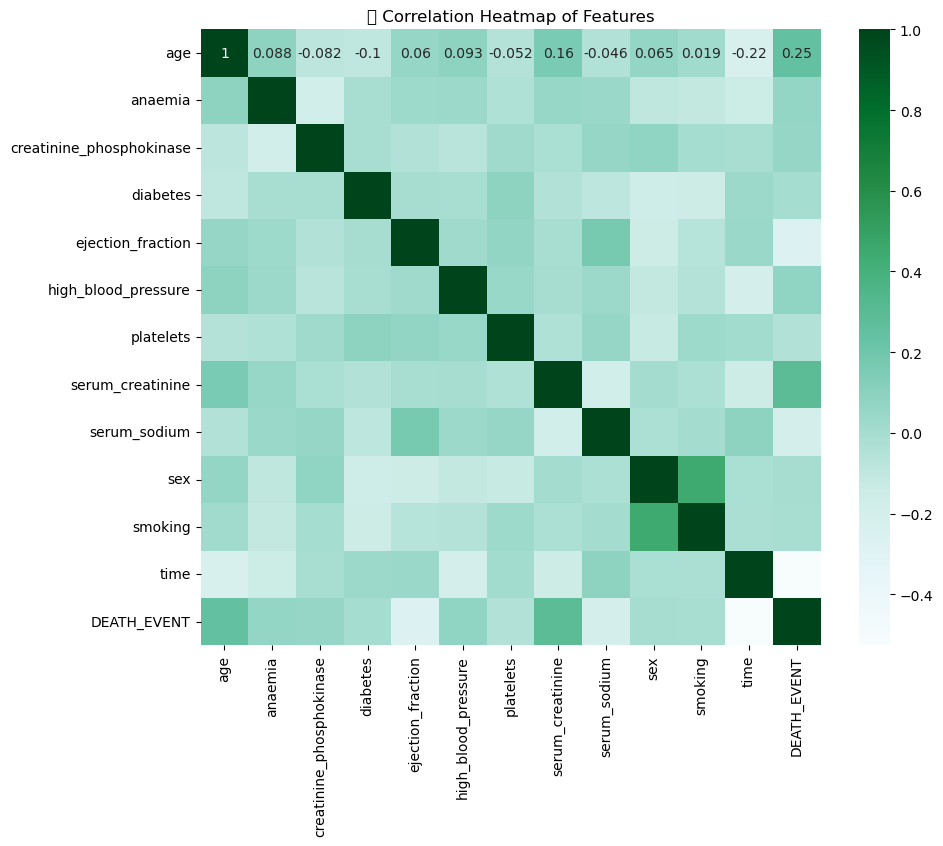

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))  # Optional: set figure size
sns.heatmap(df.corr(), cmap="BuGn", annot=True)
plt.title("🔍 Correlation Heatmap of Features")
plt.show()


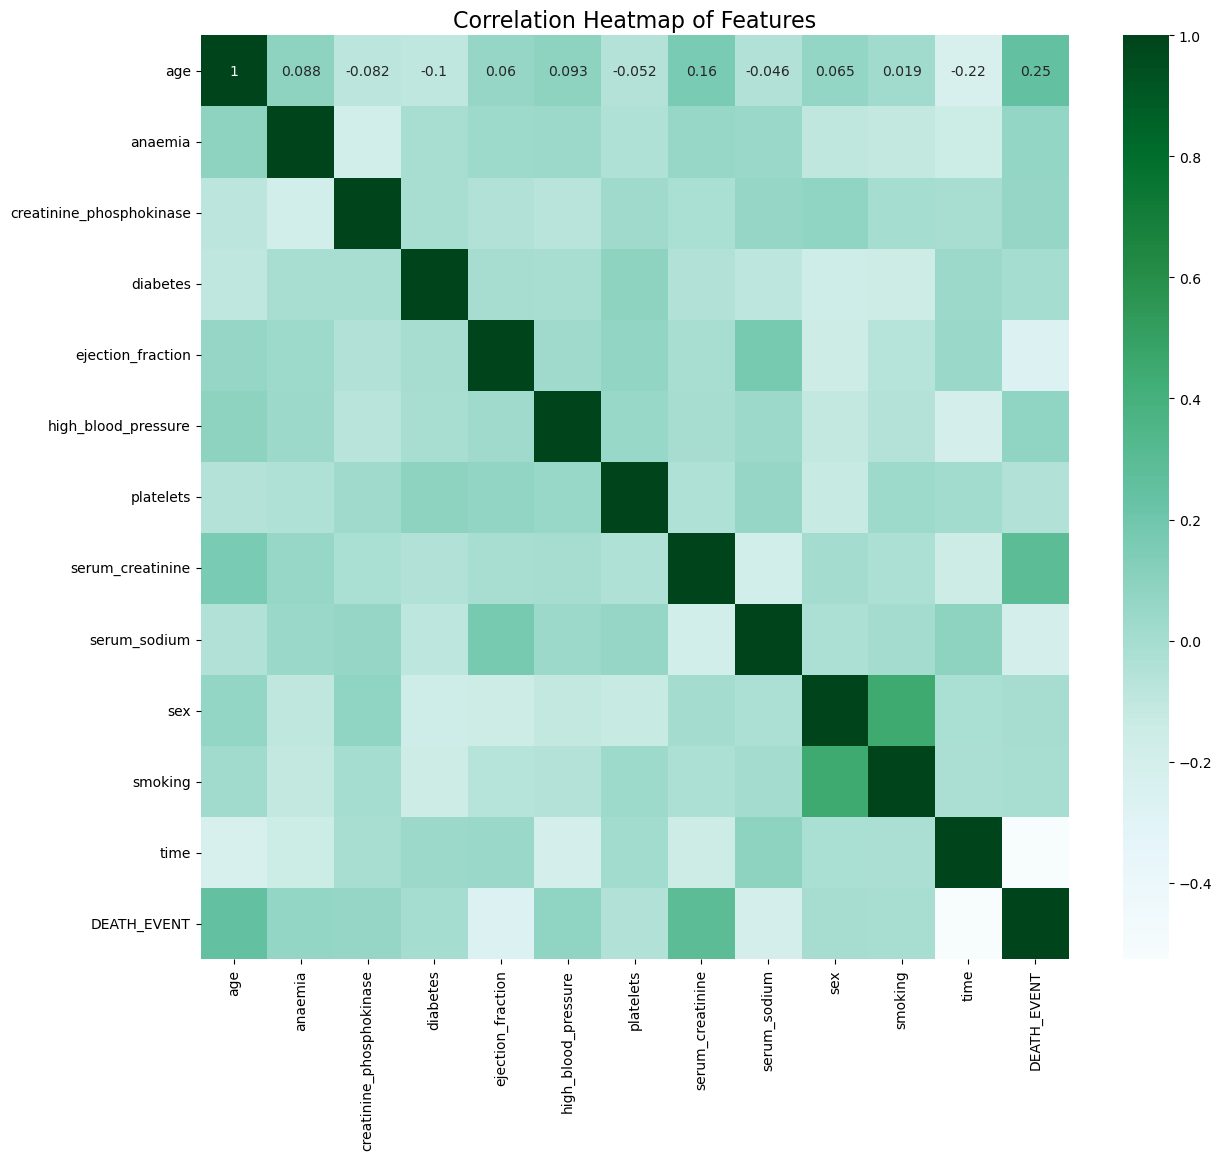

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a good figure size
plt.figure(figsize=(14, 12))

# Create the heatmap
sns.heatmap(df.corr(), cmap="BuGn", annot=True)

# Add a title
plt.title("Correlation Heatmap of Features", fontsize=16)

# Show the plot
plt.show()


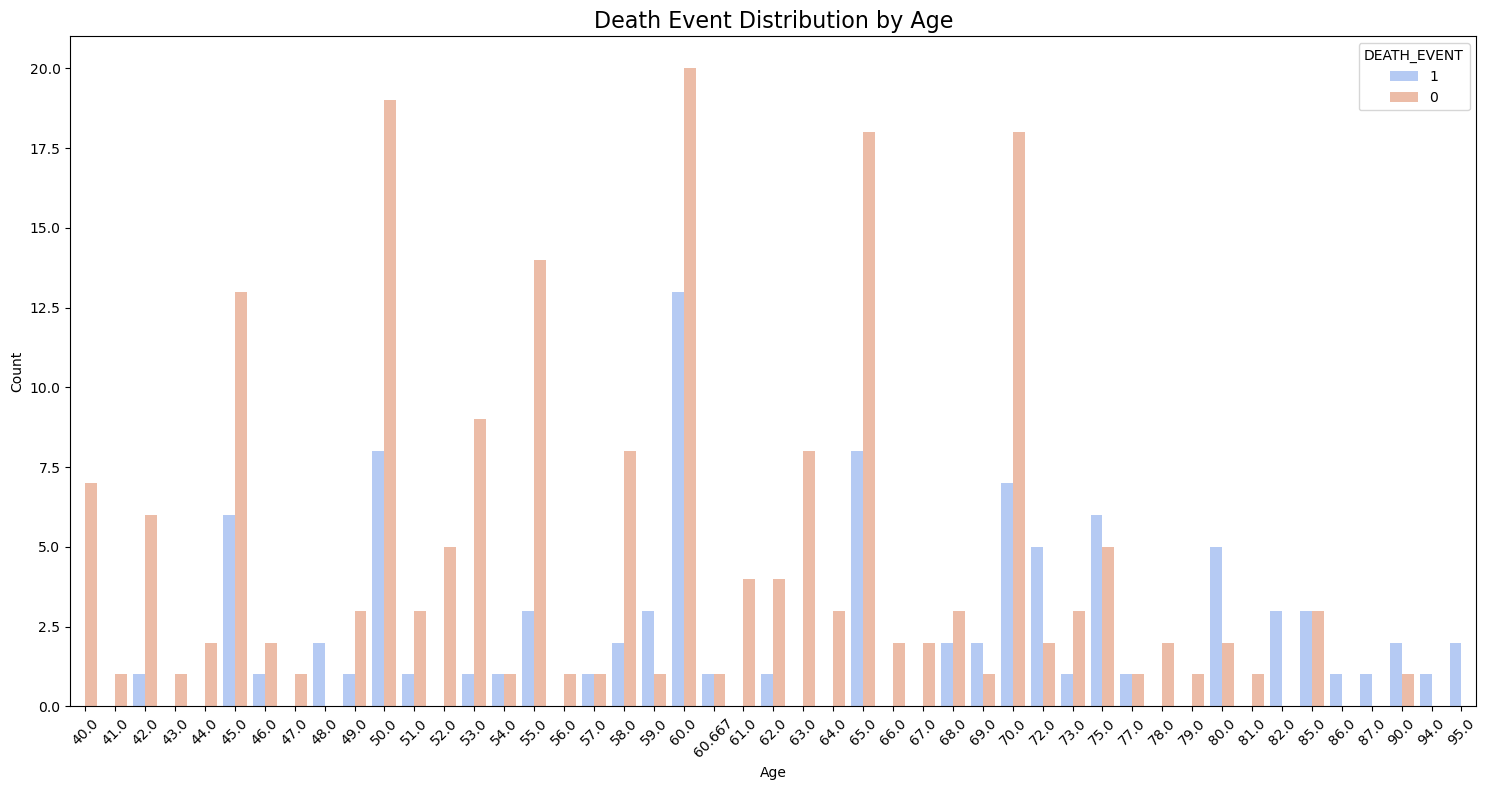

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert hue column to string to avoid legend issues
df['DEATH_EVENT'] = df['DEATH_EVENT'].astype(str)

plt.figure(figsize=(15, 8))
sns.countplot(x='age', data=df, hue='DEATH_EVENT', palette='coolwarm')

plt.title("Death Event Distribution by Age", fontsize=16)
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_n

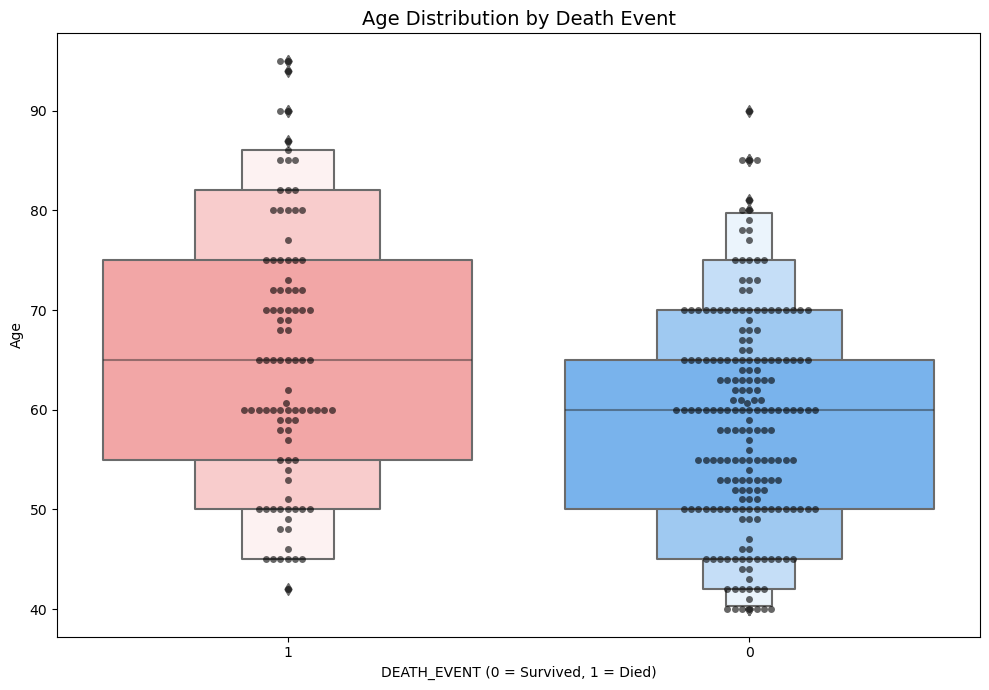

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_n

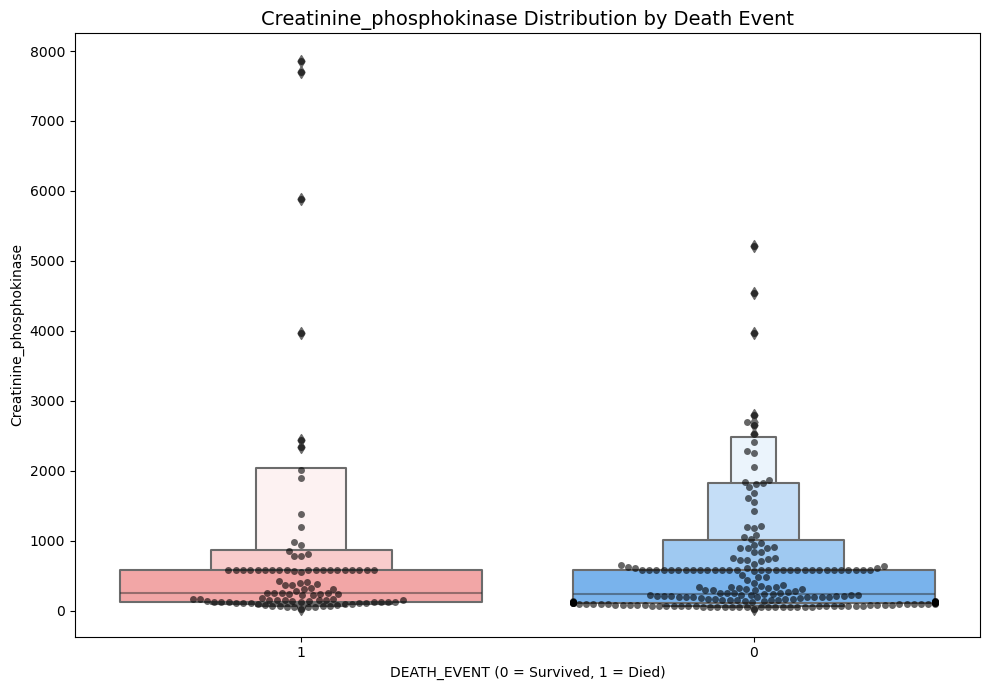

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_n

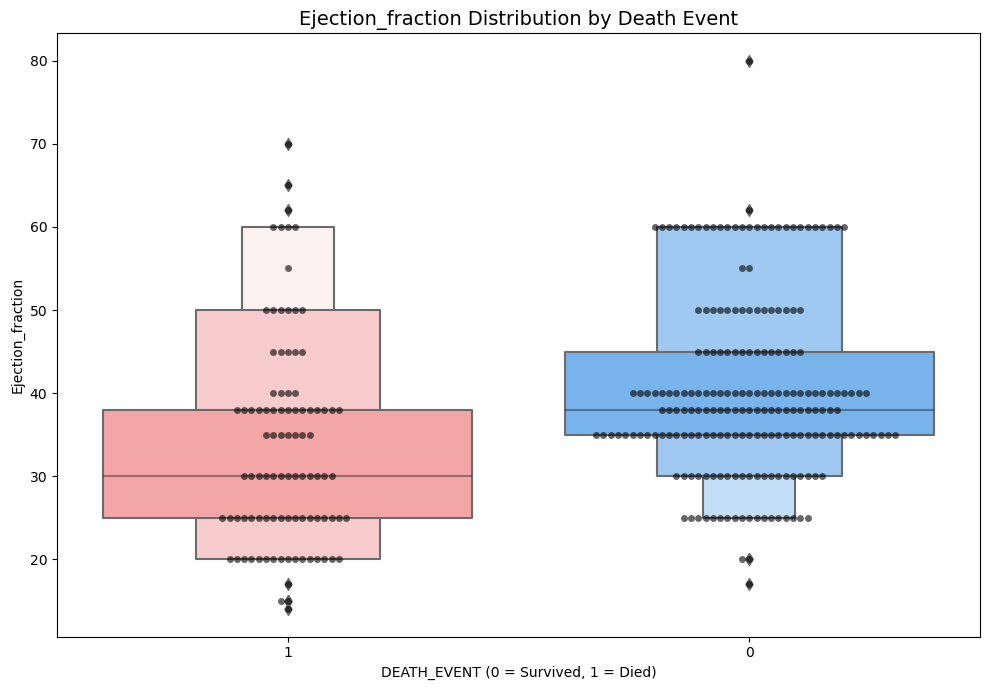

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_n

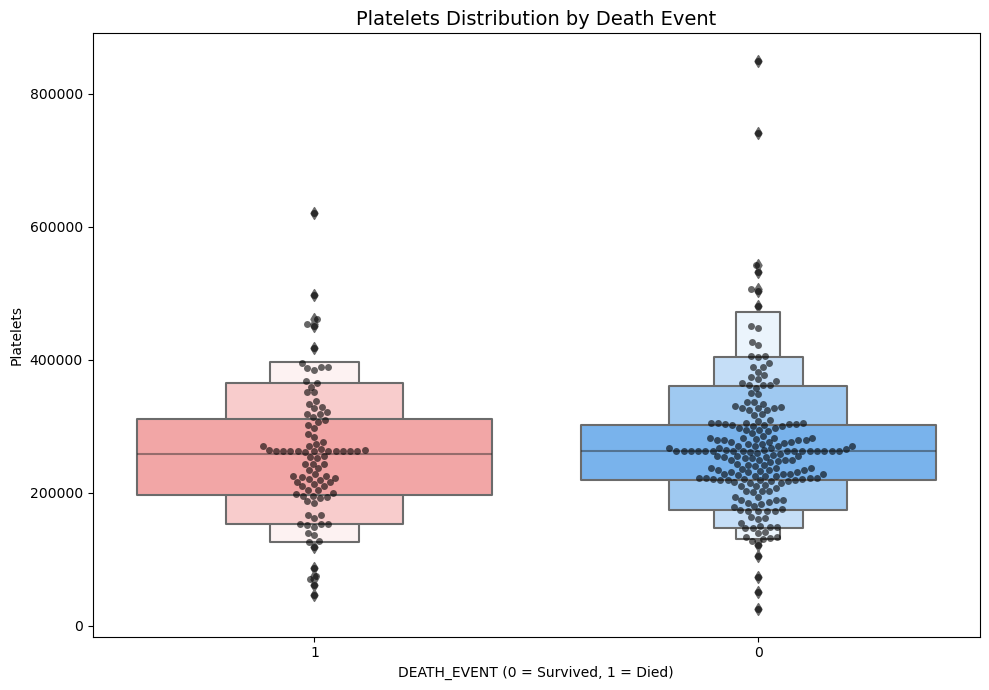

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_n

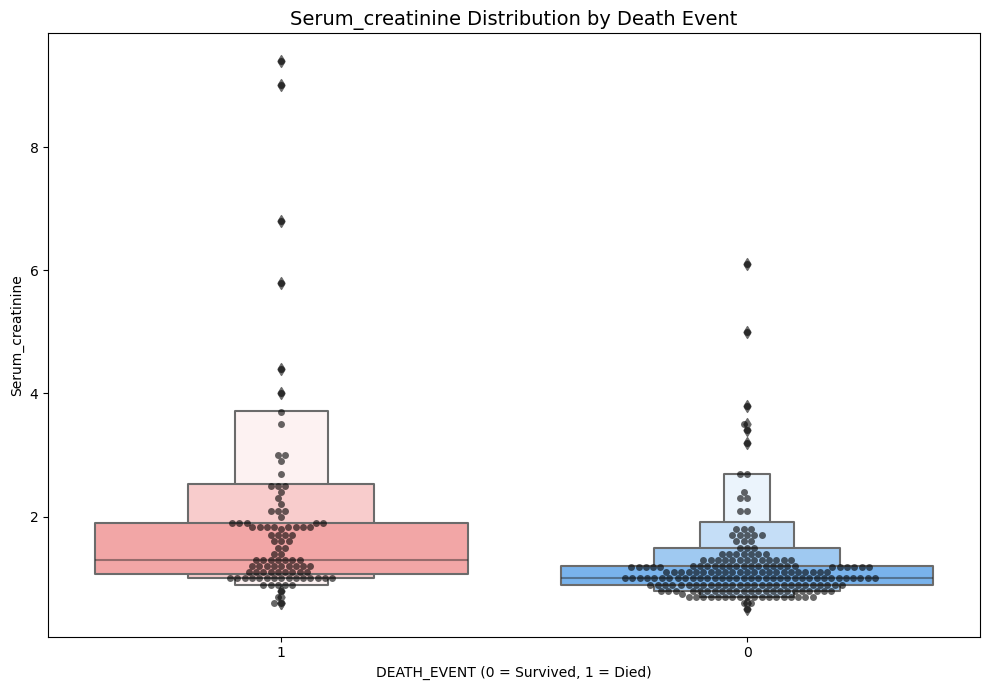

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_n

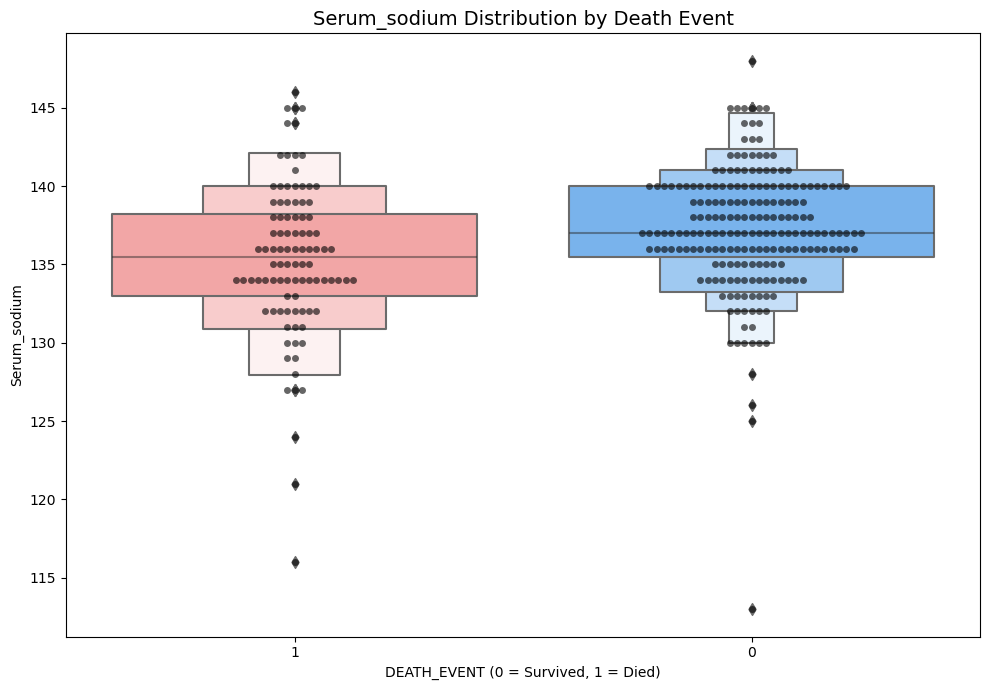

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_n

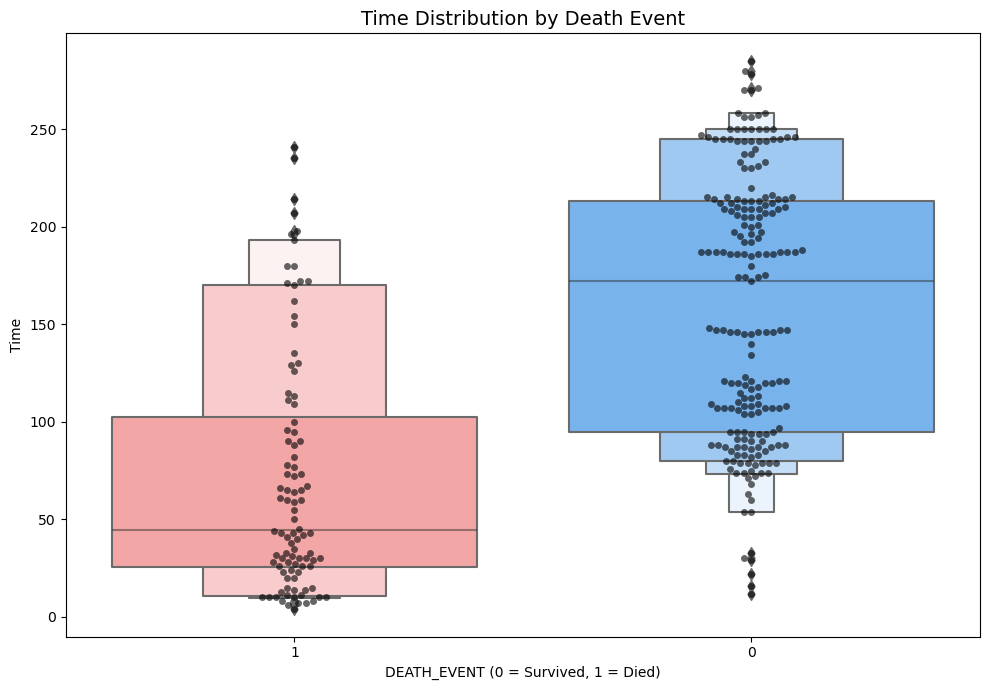

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Replace inf values with NaN to avoid Seaborn/Pandas warnings
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Ensure DEATH_EVENT is treated as category
df["DEATH_EVENT"] = df["DEATH_EVENT"].astype(str)

# Define color palette
cols = ['#ff9999', '#66b3ff']  # Red and Blue

# Feature list
features = ["age", "creatinine_phosphokinase", "ejection_fraction", 
            "platelets", "serum_creatinine", "serum_sodium", "time"]

# Loop through each feature and plot
for i in features:
    plt.figure(figsize=(10, 7))

    # Swarmplot (dot spread for each sample)
    sns.swarmplot(x="DEATH_EVENT", y=i, data=df, color="black", alpha=0.6)

    # Boxenplot (distribution shape)
    sns.boxenplot(x="DEATH_EVENT", y=i, data=df, palette=cols)

    # Titles and labels
    plt.title(f"{i.capitalize()} Distribution by Death Event", fontsize=14)
    plt.xlabel("DEATH_EVENT (0 = Survived, 1 = Died)")
    plt.ylabel(i.capitalize())
    plt.tight_layout()
    plt.show()


In [29]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(["DEATH_EVENT"], axis=1)
y = df["DEATH_EVENT"]

# Get column names for reference
col_names = list(X.columns)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame with original column names
X_scaled = pd.DataFrame(X_scaled, columns=col_names)

# View the scaled data
X_scaled.describe().T


,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [31]:
import numpy as np

# Replace any inf/-inf values with NaN
X_scaled.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN (optional, only if plotting breaks)
# X_scaled.dropna(inplace=True)


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_in

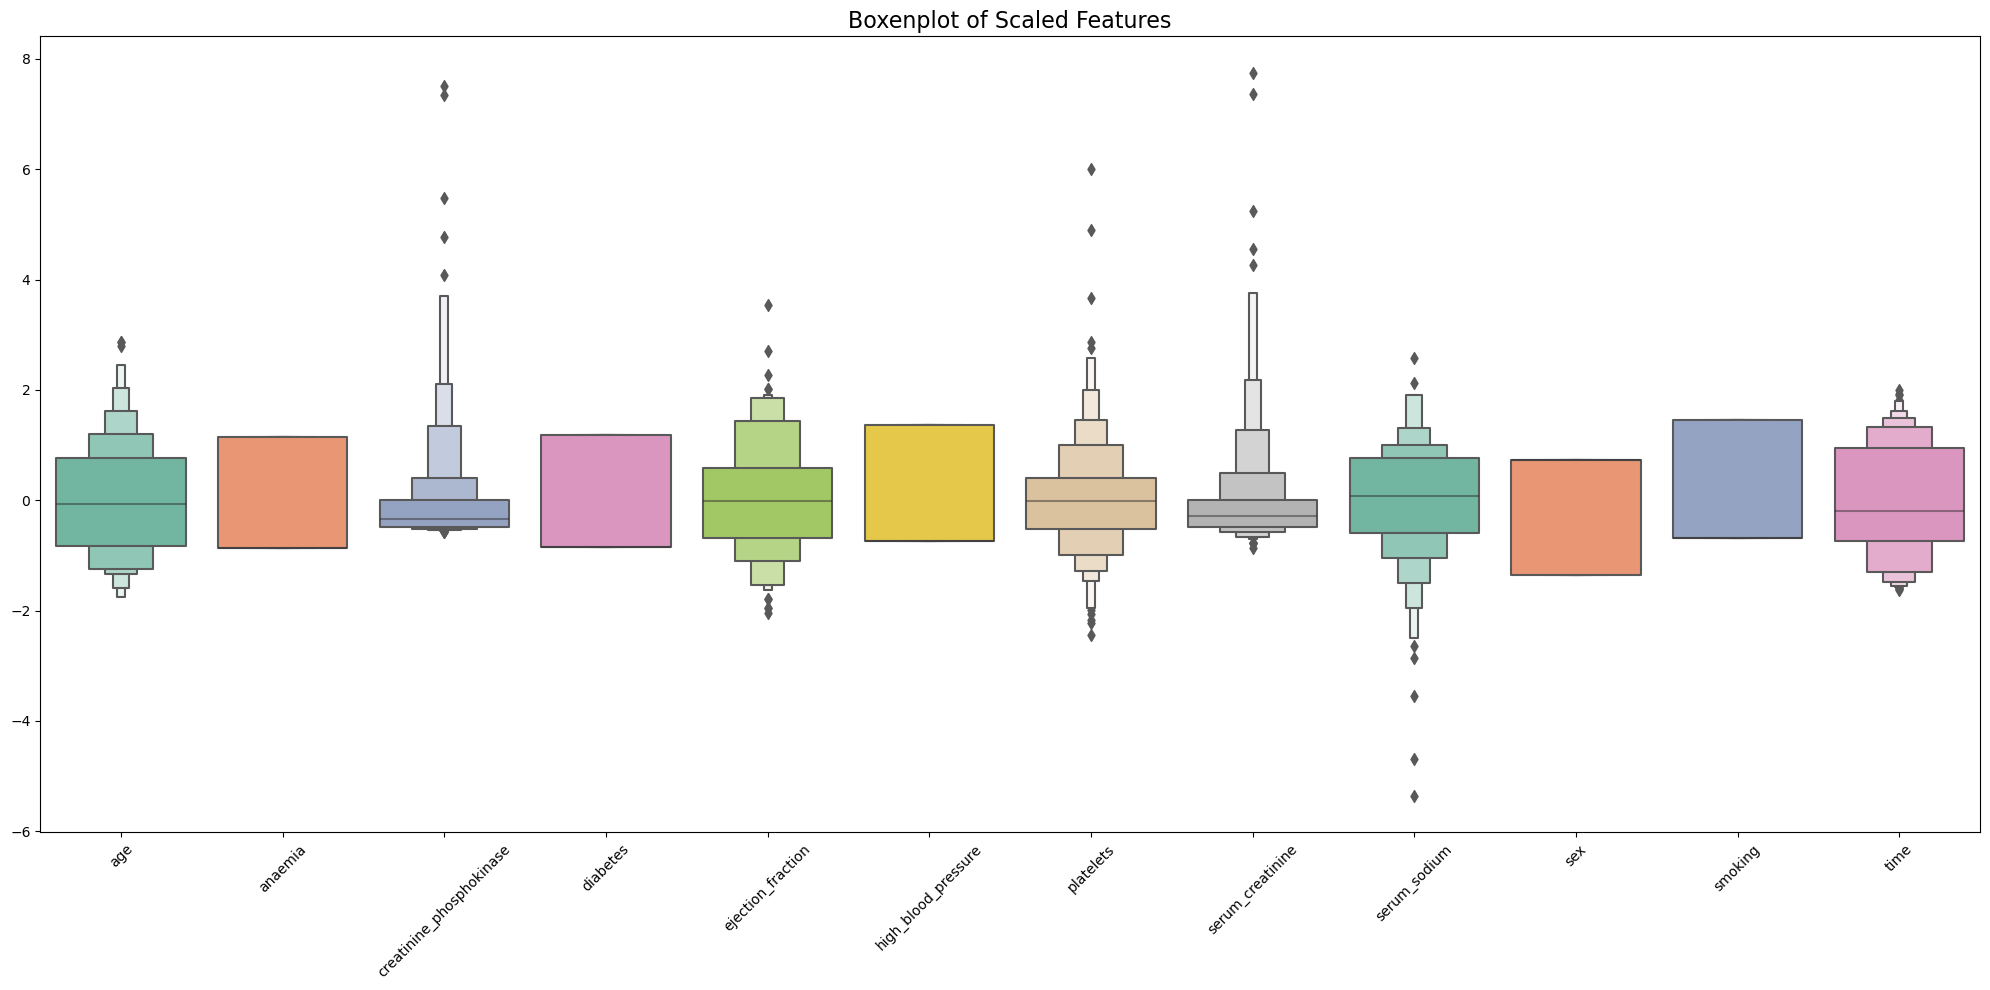

In [32]:
plt.figure(figsize=(20, 10))
sns.boxenplot(data=X_scaled, palette="Set2")
plt.title("Boxenplot of Scaled Features", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
from sklearn import svm
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Initialize the SVM model
model = svm.SVC()

# Train the model
model.fit(X_train, y_train)


SVC()

In [34]:
from sklearn.metrics import accuracy_score

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", round(accuracy * 100, 2), "%")


SVM Accuracy: 75.0 %


In [35]:
# Make predictions using the trained SVM model
y_pred = model.predict(X_test)

# Display predictions
y_pred


array(['0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0',
       '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '1', '0', '1'], dtype=object)

In [36]:
y_test

281    0
265    0
164    1
9      1
77     0
278    0
93     1
109    0
5      1
173    0
97     0
195    1
184    1
154    0
57     0
60     1
147    0
108    0
63     1
140    1
155    0
104    0
247    0
46     1
42     1
275    0
280    0
116    0
213    1
236    0
17     1
239    0
33     0
24     1
45     1
7      1
113    1
194    1
111    0
92     0
75     1
82     1
118    0
76     0
129    0
197    0
210    0
288    0
219    0
178    0
144    1
186    1
84     1
248    0
277    0
73     0
244    0
25     1
209    0
59     1
Name: DEATH_EVENT, dtype: object

In [37]:
y_train

6      1
183    1
185    1
146    0
30     1
      ..
188    0
71     0
106    0
270    0
102    0
Name: DEATH_EVENT, Length: 239, dtype: object

In [43]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 MB 3.3 MB/s eta 0:00:00 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 2.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.1 MB/s eta 0:00:001.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 64.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 47.4 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 45.0 MB/s eta 0:00:00 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 45.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 52.2 MB/s eta 0:00:00 0:0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd


In [ ]:
# Use your preprocessed and scaled features
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True
)


In [ ]:
model = Sequential()

# Input layer
model.add(Input(shape=(X_train.shape[1],)))  # Automatically adapts to 12 features

# Hidden layers
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))


In [ ]:
model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)


In [44]:
# Predict on test data
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")

# Accuracy and report
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nn))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_nn)
print("\nConfusion Matrix:\n", conf_matrix)


TypeError: '>' not supported between instances of 'str' and 'float'

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [47]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [48]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True
)


ModuleNotFoundError: No module named 'tensorflow'

## ✅ Conclusion

- The dataset was successfully explored and cleaned.
- Feature scaling was applied using `StandardScaler`.
- SVM and Neural Network models were built and evaluated.
- Evaluation metrics like accuracy, confusion matrix, and classification report were used.

📌 The trained models can be used to assist in medical diagnosis by predicting the likelihood of death for heart failure patients based on clinical indicators.